## ECE588 - Coursera Optional Assignments Week 1

Author - Alex Bzdel <div>
Email - alex.bzdel@duke.edu


## Imports and Data Preprocessing

In [113]:
import numpy as np
import random
from PIL import Image, ImageOps
from copy import copy, deepcopy

In [191]:
class Picture():
    """
    Picture class will hold information about an image.
    Does not currently support finding 4-neighborhoods.

    """

    # only original image link being passed into the constructor for now
    def __init__(self, original_image): # path to image as mandatory parameter to the constructor
        self.image = Image.open(original_image)
        self.image = ImageOps.grayscale(self.image) # we only want grayscale (can adapt this to change later on)
        self.image_matrix = np.array(self.image)
        
        # determine ranges we will need to iterate through
        # subtracting 1 because Python uses 0-based indexing
        self.x_range = self.image_matrix.shape[0] - 1
        self.y_range = self.image_matrix.shape[1] - 1

        # init cur_x and cur_y to be 0
        # will adjust these parameters to find various neighborhoods of the image
        self.cur_x = 0
        self.cur_y = 0

        # upper and lower bounds - will help us find how far we should look for a neighborhood of a pixel
        self.cur_lower_bound = 0
        self.cur_upper_bound = 0

        # temporary lists to hold a given index's current neighbors and current neighbor values
        self.cur_neighbors = []
        self.cur_vals = []

        # our average values from a pixel's neighbors
        self.cur_avg = 0

    def spatial_average(self, k):
        """
        Final function that loops through picture's values and places their averages in new_image.

            Parameters:
                k (int): range of values we want around our pixel (KxK box)

            Returns:
                new_image (2D NumPy array): Matrix representation of our blurred image

        """
        new_image = deepcopy(self.image_matrix)

        for y in range(self.y_range):
            for x in range(self.x_range):
                self.cur_x = x
                self.cur_y = y

                self.find_coord_vals(k)
                self.find_neighborhood_average(k)

                # overwrite our new_image index with our average from its original neighborhood
                new_image[x][y] = self.cur_avg

                # call reset values function at every iteration to ensure no accidental duplication
                self.reset_values()

        return new_image

    def find_neighborhood_average(self, k): self.cur_avg = np.mean(self.cur_vals)

    def find_coord_vals(self, k):
        """
        Given a pixel's neighbors, this function finds the values associated at each index and stores them in self.cur_vals.
        """
        self.find_coords(k)

        for i in self.cur_neighbors:
            if self.checks(i[0], i[1]): # call check function
                self.cur_vals.append(self.image_matrix[i[0]][i[1]])

    def find_coords(self, k):
        """
        Finds a KxK neighborhood around a given point.
        """

        # call our find_bounds function to know which pixels are in our neighborhood
        self.find_bounds(k)

        # iterate through each element of our x range
        for i in range(self.cur_x - self.cur_lower_bound, self.cur_x + self.cur_upper_bound):
            # iterate through each element of our y range
            for j in range(self.cur_y - self.cur_lower_bound, self.cur_y + self.cur_upper_bound):
                # iterate through y values
                # we should be able to iterate through the entire neighborhood of a pixel (size of which is defined by the tunable k value)
                # append current neighbor values - will be passed into a non-implemented function later
                self.cur_neighbors.append([i, j])

    def find_bounds(self, k):
        """
        Finds the amount we have to add and subtract by in order to iterate through our entire neighborhood.
        """
        self.cur_lower_bound = int(np.floor(k/2))
        self.cur_upper_bound = int(np.floor(k/2) + 1)


    def checks(self, x, y):
        """
        Performs tests to ensure the edges of the image are captured correctly.
        """
        if x < 0 or x > self.x_range:
            return False
        if y < 0 or y > self.y_range:
            return False

        return True


    def reset_values(self):
        self.cur_neighbors = []
        self.cur_vals = []

In [192]:
# testing functions
orig_image = Picture('p1872766193-3.jpg')
new_image = orig_image.spatial_average(5)

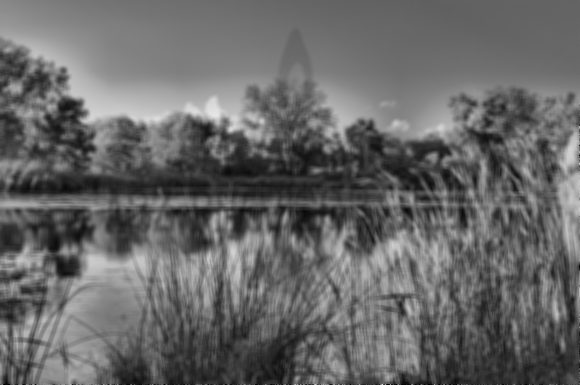

In [193]:
Image.fromarray(np.uint8(new_image))

In [38]:
orig_image = Picture('p1872766193-3.jpg')

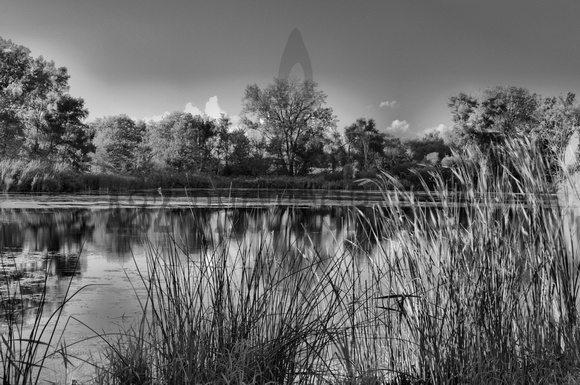

In [26]:
orig_image.image